In [1]:
# libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

from scipy.interpolate import make_interp_spline

In [2]:
# datasets
items_data = pd.read_csv('/kaggle/input/supermarket-sales-data/annex1.csv')
items_checkout = pd.read_csv('/kaggle/input/supermarket-sales-data/annex2.csv')
items_wholesale_price = pd.read_csv('/kaggle/input/supermarket-sales-data/annex3.csv')
items_loss_rate = pd.read_csv('/kaggle/input/supermarket-sales-data/annex4.csv')

In [3]:
# columns 
items_data.columns

Index(['Item Code', 'Item Name', 'Category Code', 'Category Name'], dtype='object')

In [4]:
# columns 
items_checkout.columns

Index(['Date', 'Time', 'Item Code', 'Quantity Sold (kilo)',
       'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)'],
      dtype='object')

In [5]:
# columns
items_wholesale_price.columns

Index(['Date', 'Item Code', 'Wholesale Price (RMB/kg)'], dtype='object')

In [6]:
# columns
items_loss_rate.columns

Index(['Item Code', 'Item Name', 'Loss Rate (%)'], dtype='object')

In [7]:
# head 
items_data.head(3)

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables


In [8]:
# head 
items_checkout.head(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No


In [9]:
# head 
items_wholesale_price.head(3)

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19


In [10]:
# head 
items_loss_rate.head(3)

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80


In [11]:
# shapes of:
print('Total rows {} and colums {} of items_data'.format(items_data.shape[0], items_data.shape[1]))
print('Total rows {} and colums {} of items_checkout'.format(items_checkout.shape[0], items_checkout.shape[1]))
print('Total rows {} and colums {} of items_wholesale_price'.format(items_wholesale_price.shape[0], items_wholesale_price.shape[1]))
print('Total rows {} and colums {} of items_loss_rate'.format(items_loss_rate.shape[0], items_loss_rate.shape[1]))

Total rows 251 and colums 4 of items_data
Total rows 878503 and colums 7 of items_checkout
Total rows 55982 and colums 3 of items_wholesale_price
Total rows 251 and colums 3 of items_loss_rate


In [12]:
# information of
items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [13]:
# information of
items_checkout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 46.9+ MB


In [14]:
# information of 
items_wholesale_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      55982 non-null  object 
 1   Item Code                 55982 non-null  int64  
 2   Wholesale Price (RMB/kg)  55982 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [15]:
# information of
items_loss_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item Code      251 non-null    int64  
 1   Item Name      251 non-null    object 
 2   Loss Rate (%)  251 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


## 🔄 Data Preprocessing

In [16]:
# merge items_checkout with items_data and create df 
df = pd.merge(items_checkout, items_data)
df.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,1011010101,Flower/Leaf Vegetables
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,1011010101,Flower/Leaf Vegetables


In [17]:
# Convert date format
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0        2020-07-01
1        2020-07-01
2        2020-07-01
3        2020-07-01
4        2020-07-01
            ...    
878498   2023-06-30
878499   2023-06-30
878500   2023-06-30
878501   2023-06-30
878502   2023-06-30
Name: Date, Length: 878503, dtype: datetime64[ns]

In [18]:
# create a colum total revenue
df["total_revenue"] = df["Quantity Sold (kilo)"] * df["Unit Selling Price (RMB/kg)"]
df.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name,total_revenue
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,3.0096
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,2.7168
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,3.1084
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,1011010101,Flower/Leaf Vegetables,4.2100
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,1011010101,Flower/Leaf Vegetables,4.3120


## 📊 Exploratory Data Analysis (EDA)

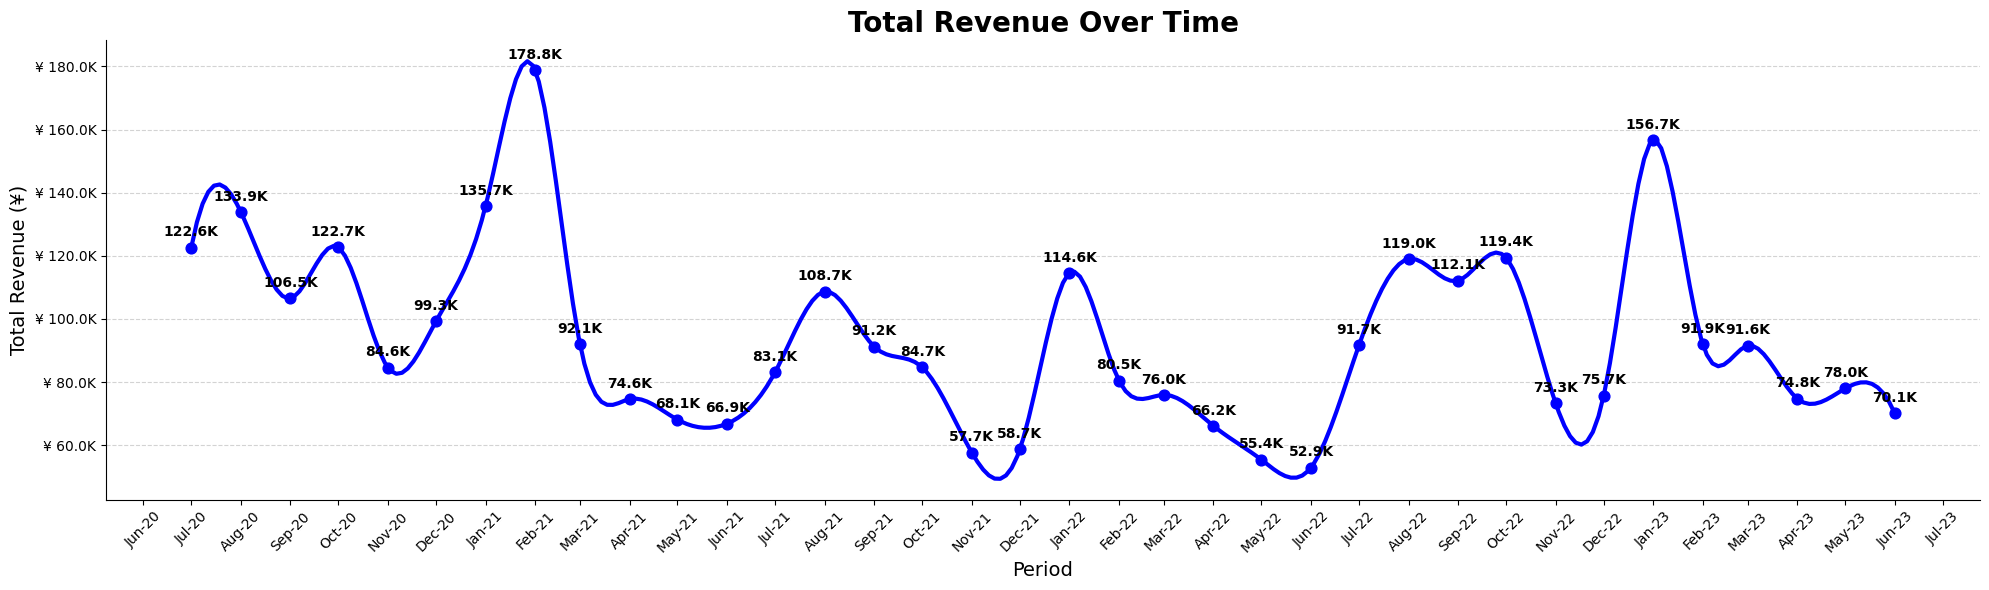

In [19]:
def chart_sales_overtime(df):
    # Agrega receita total por mês
    data = df.groupby(df['Date'].dt.to_period('M'))['total_revenue'].sum().reset_index()
    data['Date'] = data['Date'].dt.to_timestamp()

    # Conversão para spline
    x = mdates.date2num(data['Date'])
    y = data['total_revenue'].values

    x_smooth = np.linspace(x.min(), x.max(), 300)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)
    x_smooth_dates = mdates.num2date(x_smooth)

    # Criar gráfico
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot(x_smooth_dates, y_smooth, color='blue', linewidth=3, label='Smoothed Revenue')
    ax.scatter(data['Date'], y, color='blue', s=60, zorder=5)

    # Adiciona rótulos com valores de vendas acima dos pontos
    for i, (date, value) in enumerate(zip(data['Date'], y)):
        ax.text(date, value + (max(y) * 0.02), f'{value/1000:.1f}K', ha='center', fontsize=10, fontweight='bold')

    # Título e rótulos
    ax.set_title('Total Revenue Over Time', fontsize=20, fontweight='bold', fontname='Arial')
    ax.set_xlabel('Period', fontsize=14, fontname='Arial')
    ax.set_ylabel('Total Revenue (¥)', fontsize=14, fontname='Arial')

    # Formatação eixo Y com milhar
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'¥ {x/1000:.1f}K'))

    # Formatação eixo X: mostra todos os meses, formato 25-May
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    plt.xticks(rotation=45)

    # Estilo
    ax.grid(True, axis='y', linestyle='--', color='lightgray')
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

chart_sales_overtime(df)
